# Versuch1

## 1. Ermittlung der Kennlinie des Abstandssensors

Erstellen Sie eine Python-Funktion, welche die Daten aus der Datei einliest (verwenden Sie
dazu die Numpy-Funktion genfromtxt()), von den Daten die ersten 1000 Werte überspringt
und aus den nächsten Werten den Mittelwert und die Standardabweichung berechnet (der
Einschwingvorgang wird dadurch ignoriert). Vergleichen Sie die Ergebnisse mit den Werten
aus ihrem Messprotokoll. Stellen Sie die gefundene Übertragungsfunktion bzw. Kennlinie im
Protokoll graphisch mit Python bzw. Matplotlib dar.

[ 1.  1.  1. ...,  1.  1.  1.]
5.78662846227
8.19153106088
[    0     1     2 ..., 76428 76429 76430]


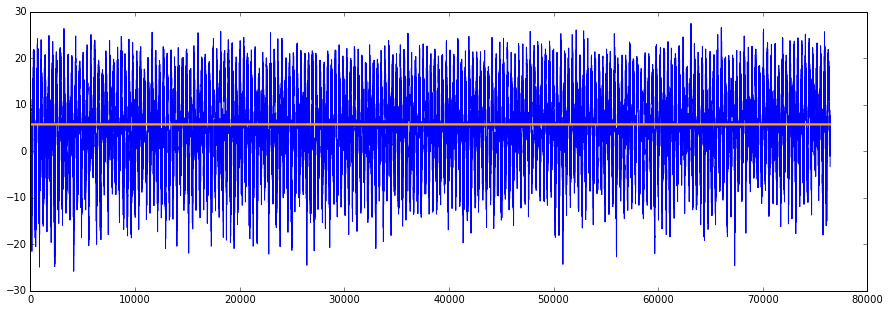

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#lese nach ersten 1000 die Daten ein
data = np.genfromtxt('stockholm_td_adj.dat', skip_header = 1000 )
print(data[:,6])
# data ist vom typ ndarray
# lese aus tuple die hoehe x und die breite y
x,y= data.shape

#Mittelwert
m = np.mean(data[:,5])
print(m)
mAchse = np.linspace(m,m,x)

#Standartabweichung
sta = np.std(data[:,5])
print(sta)

# generiere array von 0 bis groesse x-1
xAchse = np.arange(0,x)
#info
print(xAchse)

# Anzeige
# Rahmen bauen
fig, ax = plt.subplots(figsize=(15,5))
# daten ausgeben plot(x,y)
ax.plot(xAchse , data[:,5], color = "blue")
ax.plot(xAchse , mAchse, color = "orange", linestyle = "-", linewidth = 2.3)

# 2. Modellierung der Kennlinie durch lineare Regression


statt die Regression direkt auf den Werten x und y zu berechnen, werden
Eingangs- und Ausgangswerte zunächst logarithmiert, d.h. wir erhalten neue Paare aus
Eingangs- und Ausgangswerten x0 und y0 mit y0 = ln y und x0 = ln x bzw. umgekehrt x = eyp(x0).
Setzt man beides in die Kennlinie ein, so ergibt sich

Vorgehensweise:
1. Logarithmieren Sie zunächst alle Eingangs- und Ausgangswerte in der Tabelle und
stellen den Zusammenhang graphisch dar.
2. Die resultierende Kennlinie sollte die Form einer Geraden haben.
3. Berechnen Sie mithilfe der linearen Regression, wie in der Vorlesung behandelt, die
Ausgleichsgerade in Python. Eliminieren Sie ggf. Werte für sehr große Entfernungen,
für die der lineare Zusammenhang nicht mehr gilt.

[[  1.00000000e+00   1.10000000e+00]
 [  2.00000000e+00   5.50000000e+00]
 [  3.00000000e+00   1.80000000e+01]
 [  4.00000000e+00   7.42000000e+01]
 [  5.00000000e+00   2.25400000e+02]
 [  6.00000000e+00   1.16600000e+02]
 [  7.00000000e+00   2.50000000e+02]
 [  8.00000000e+00   6.10000000e+02]
 [  9.00000000e+00   6.30000000e+02]
 [  1.00000000e+01   1.50000000e+03]]
[[ 0.          0.09531018]
 [ 0.69314718  1.70474809]
 [ 1.09861229  2.89037176]
 [ 1.38629436  4.30676415]
 [ 1.60943791  5.4178766 ]
 [ 1.79175947  4.75874927]
 [ 1.94591015  5.52146092]
 [ 2.07944154  6.41345896]
 [ 2.19722458  6.44571982]
 [ 2.30258509  7.31322039]]
[  1.10000000e+00   5.50000000e+00   1.80000000e+01   7.42000000e+01
   2.25400000e+02   1.16600000e+02   2.50000000e+02   6.10000000e+02
   6.30000000e+02   1.50000000e+03]


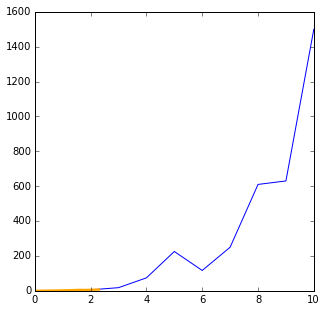

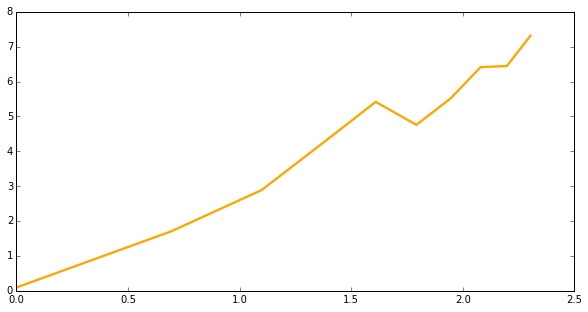

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#lade BeispielDaten
data = np.genfromtxt('BeispielDatenzusammenhangUngenau.dat')
print(data)

#Kopie Logarithmieren
#!!!! so: log = data
#gehts nicht, da Objekt refernz kopiert wird
# deshalb:
log = np.copy(data)

for row_idx, row in enumerate(log):
    for col_idx, col in enumerate(row):
        log[row_idx,col_idx] = math.log(col)
print(log)

# beide kurven abbilden
# Rahmen bauen
fig, ax = plt.subplots(figsize=(5,5))
# daten ausgeben plot(x,y)
print(data[:,1])
ax.plot(data[:,0] , data[:,1], color = "blue")
ax.plot(log[:,0], log[:,1], color = "orange", linestyle = "-", linewidth = 2.3)
#nochmal log in gross
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(log[:,0], log[:,1], color = "orange", linestyle = "-", linewidth = 2.3)




In [120]:
# lineare reg
from scipy import stats

# a = steigung,b = schnittpunkt,korrelationskoeffizient,p-wert,Standart Fehler
# linData = stats.linregress(data)
a,b,r,p,R2 = stats.linregress(log)
print(a,b)

3.07830893138 -0.162836798983


Die Rückrechnung auf den ursprünglichen Zusammenhang geschieht über die Umkehrung
der doppelten Logarithmierung:

[[  1.00000000e+00   1.10000000e+00]
 [  2.00000000e+00   5.50000000e+00]
 [  3.00000000e+00   1.80000000e+01]
 [  4.00000000e+00   7.42000000e+01]
 [  5.00000000e+00   2.25400000e+02]
 [  6.00000000e+00   1.16600000e+02]
 [  7.00000000e+00   2.50000000e+02]
 [  8.00000000e+00   6.10000000e+02]
 [  9.00000000e+00   6.30000000e+02]
 [  1.00000000e+01   1.50000000e+03]]
[[  1.00000000e+00   8.49729854e-01]
 [  2.00000000e+00   7.17702074e+00]
 [  3.00000000e+00   2.50038852e+01]
 [  4.00000000e+00   6.06188266e+01]
 [  5.00000000e+00   1.20483197e+02]
 [  6.00000000e+00   2.11188770e+02]
 [  7.00000000e+00   3.39432733e+02]
 [  8.00000000e+00   5.12001048e+02]
 [  9.00000000e+00   7.35756515e+02]
 [  1.00000000e+01   1.01762978e+03]]


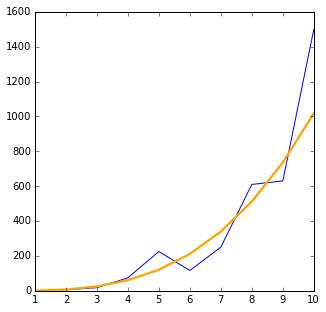

In [121]:
#mit data werten weiter rechnen
#vorher kopie
kennlinie = np.copy(data)
print(kennlinie)

#fkt fuer berechnung der neuen y werte, welche die alten annähernd beschreiben sollten
def umkehrFkt(x):
    return (math.exp(b)*(x**a))

#itterieren ueber reihen der matrix und fuege neue y werte ein
for row_idx, row in enumerate(kennlinie):
    x,y = row
    kennlinie[row_idx,1] = umkehrFkt(x)
print(kennlinie)

# beide kurven abbilden
# Rahmen bauen
fig, ax = plt.subplots(figsize=(5,5))
# daten ausgeben plot(x,y)
ax.plot(data[:,0] , data[:,1], color = "blue")
ax.plot(kennlinie[:,0], kennlinie[:,1], color = "orange", linestyle = "-", linewidth = 2.3)